In [ ]:
!pip install ultralytics
#installing the YOLOv8 model
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode = checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 532, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'train', 'export', 'track', 'val', 'benchmark'}.

    Arguments received: ['yolo', 'mode', '=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'pose', 'classify', 'detect', 'segment'}
                MODE (required) is one of {'predict', 'train', 'export', 'track', 'val', 'benchmark'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all AR

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QgekeJr37oDZWfaaKE6o")
project = rf.workspace("ai-for-microscopy-diagnosis").project("ocular-sx12d")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.31, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Ocular-4 in yolov8:: 100%|██████████| 1954/1954 [00:04<00:00, 463.28it/s]


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import defaultdict
import pandas as pd

Defining paths

In [ ]:
# Define dataset paths
train_path = '/content/Ocular-4/train'
valid_path = '/content/Ocular-4/valid'
test_path = '/content/Ocular-4/test'

# Function to get image and label paths
def get_paths(base_path):
    image_paths = glob.glob(os.path.join(base_path, 'images', '*'))
    label_paths = glob.glob(os.path.join(base_path, 'labels', '*'))
    return image_paths, label_paths

**Printing the number of images in each dataset**

In [ ]:
train_images, _ = get_paths(train_path)
valid_images, _ = get_paths(valid_path)
test_images, _ = get_paths(test_path)

valid_labels, _ = get_paths(valid_path)
test_labels,_ = get_paths(test_path)
print(f"Number of images in train: {len(train_images)}")
print(f"Number of images in valid: {len(valid_images)}")
print(f"Number of images in test: {len(test_images)}")

Number of images in train: 687
Number of images in valid: 192
Number of images in test: 92


**Class frequency of the whole dataset**

Entire dataset:
falciparum_trophozoite: 2985
wbc: 3845



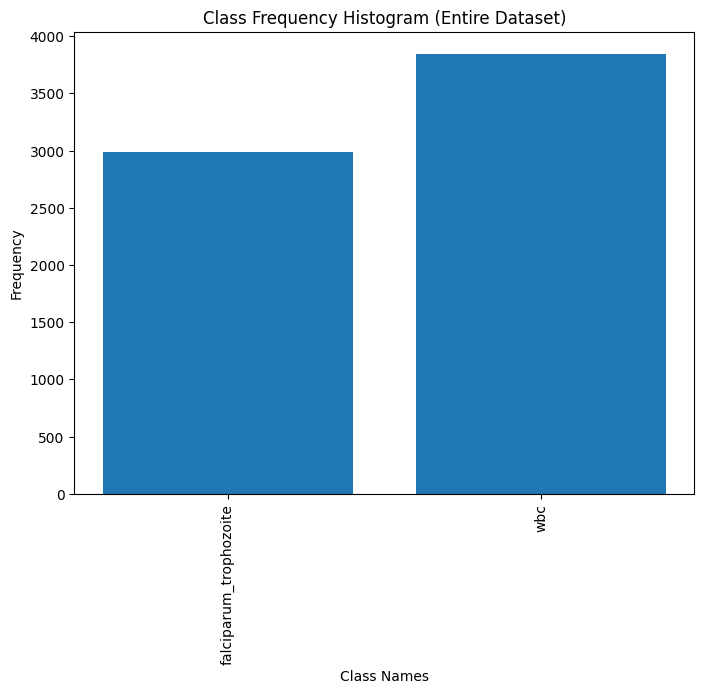

In [ ]:
import yaml
import os
import collections
import matplotlib.pyplot as plt

#  path to dataset directory
dataset_dir = '/content/Ocular-4'

# Loading data.yaml file
with open(os.path.join(dataset_dir, 'data.yaml'), 'r') as f:
    data = yaml.safe_load(f)

# Getting class names from the data.yaml file
class_names = data['names']
num_classes = len(class_names)

# Function to get class frequencies for the entire dataset
def get_class_frequencies():
    label_files = []
    for split in ['train', 'valid', 'test']:
        split_dir = os.path.join(dataset_dir, split)
        label_files.extend([os.path.join(split_dir, 'labels', f) for f in os.listdir(os.path.join(split_dir, 'labels')) if f.endswith('.txt')])

    all_labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_label = int(line.split()[0])
                all_labels.append(class_label)

    class_counts = collections.Counter(all_labels)
    class_frequencies = [class_counts.get(i, 0) for i in range(num_classes)]

    return class_frequencies

# Get class frequencies for the entire dataset
class_frequencies = get_class_frequencies()

# Print class names and frequencies
print("Entire dataset:")
for class_name, frequency in zip(class_names, class_frequencies):
    print(f"{class_name}: {frequency}")
print()

# Plot the histogram for class frequencies
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_frequencies)
plt.xticks(rotation=90)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Class Frequency Histogram (Entire Dataset)')
plt.show()

**class frequency of the splits**

Train split:
falciparum_trophozoite: 2225
wbc: 2714

Valid split:
falciparum_trophozoite: 489
wbc: 739

Test split:
falciparum_trophozoite: 271
wbc: 392



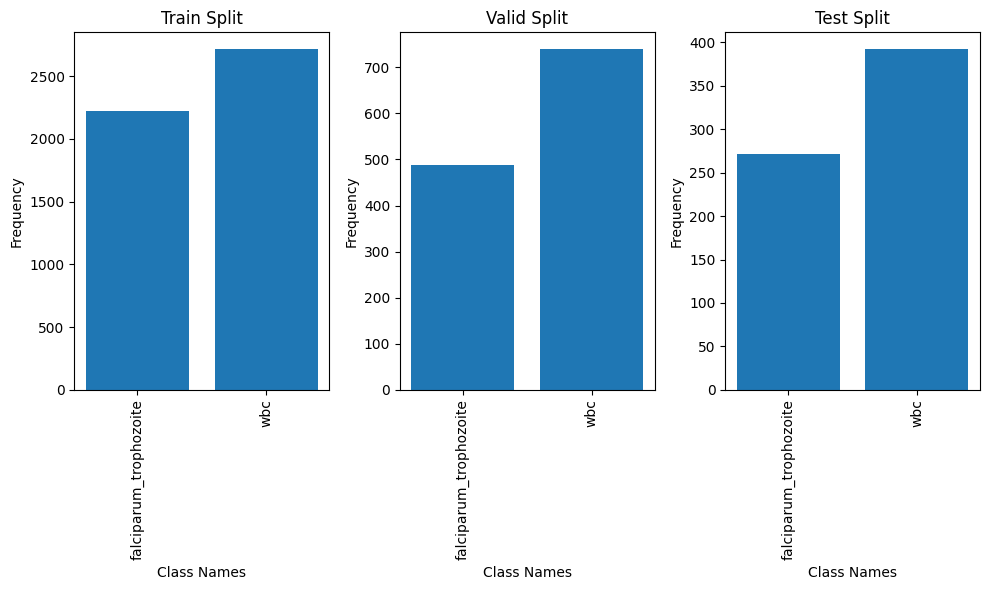

In [ ]:
import yaml
import os
import collections
import matplotlib.pyplot as plt

# Set the path to your dataset directory
dataset_dir = '/content/Ocular-4'

# Load the data.yaml file
with open(os.path.join(dataset_dir, 'data.yaml'), 'r') as f:
    data = yaml.safe_load(f)

# Get the class names from the data.yaml file
class_names = data['names']
num_classes = len(class_names)

# Function to get class frequencies for a given split
def get_class_frequencies(split):
    split_dir = os.path.join(dataset_dir, split)
    label_files = [os.path.join(split_dir, 'labels', f) for f in os.listdir(os.path.join(split_dir, 'labels')) if f.endswith('.txt')]

    all_labels = []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_label = int(line.split()[0])
                all_labels.append(class_label)

    class_counts = collections.Counter(all_labels)
    class_frequencies = [class_counts.get(i, 0) for i in range(num_classes)]

    return class_frequencies

# Get class frequencies for train, valid, and test splits
train_class_frequencies = get_class_frequencies('train')
valid_class_frequencies = get_class_frequencies('valid')
test_class_frequencies = get_class_frequencies('test')

# Print class names and frequencies for each split
print("Train split:")
for class_name, frequency in zip(class_names, train_class_frequencies):
    print(f"{class_name}: {frequency}")
print()

print("Valid split:")
for class_name, frequency in zip(class_names, valid_class_frequencies):
    print(f"{class_name}: {frequency}")
print()

print("Test split:")
for class_name, frequency in zip(class_names, test_class_frequencies):
    print(f"{class_name}: {frequency}")
print()

# Plot the histogram for class frequencies
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.bar(class_names, train_class_frequencies)
plt.xticks(rotation=90)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Train Split')

plt.subplot(1, 3, 2)
plt.bar(class_names, valid_class_frequencies)
plt.xticks(rotation=90)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Valid Split')

plt.subplot(1, 3, 3)
plt.bar(class_names, test_class_frequencies)
plt.xticks(rotation=90)
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Test Split')

plt.tight_layout()
plt.show()

**annotations per image**

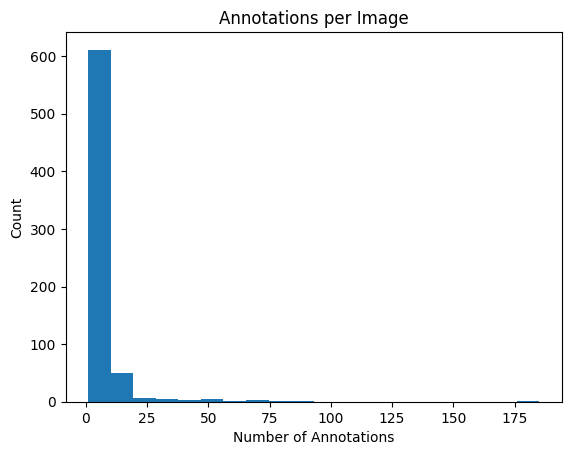

In [ ]:
def get_annotations_per_image(label_paths):
    annotations_per_image = []
    for label_path in label_paths:
        with open(label_path, 'r') as f:
            annotations_per_image.append(len(f.readlines()))
    return annotations_per_image

annotations_per_image = get_annotations_per_image(train_labels)

plt.hist(annotations_per_image, bins=20)
plt.title("Annotations per Image")
plt.xlabel("Number of Annotations")
plt.ylabel("Count")
plt.show()

**number of annotations per image in different split**s

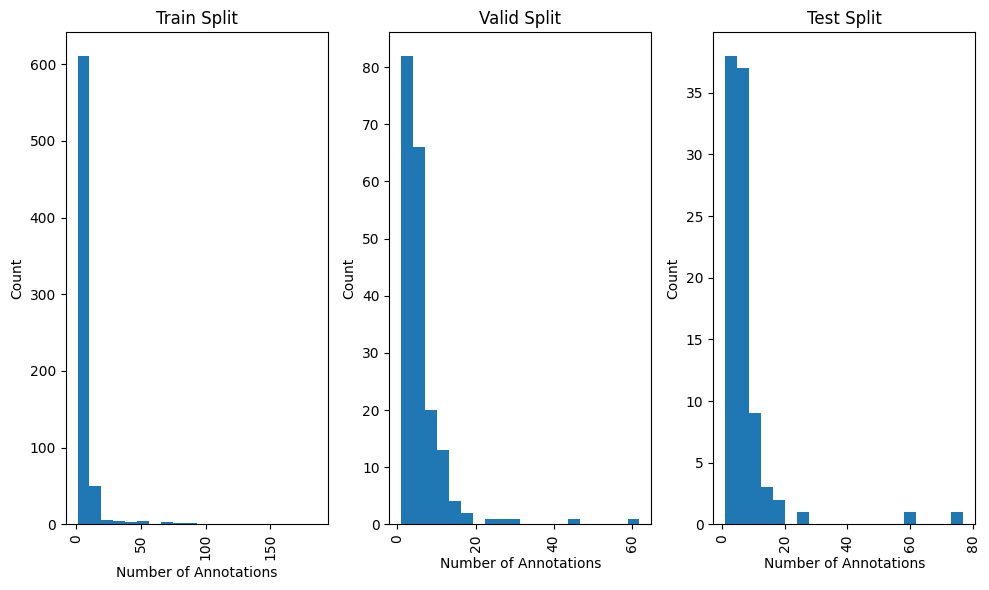

In [ ]:

# Function to get annotations per image
def get_annotations_per_image(split):
    split_dir = os.path.join(dataset_dir, split)
    label_paths = [os.path.join(split_dir, 'labels', f) for f in os.listdir(os.path.join(split_dir, 'labels')) if f.endswith('.txt')]

    annotations_per_image = []
    for label_path in label_paths:
        with open(label_path, 'r') as f:
            annotations_per_image.append(len(f.readlines()))
    return annotations_per_image

# Get annotations per image for train, valid, and test splits
train_annotations_per_image = get_annotations_per_image('train')
valid_annotations_per_image = get_annotations_per_image('valid')
test_annotations_per_image = get_annotations_per_image('test')

# Plot the histogram for annotations per image
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.hist(train_annotations_per_image, bins=20)
plt.xticks(rotation=90)
plt.xlabel('Number of Annotations')
plt.ylabel('Count')
plt.title('Train Split')

plt.subplot(1, 3, 2)
plt.hist(valid_annotations_per_image, bins=20)
plt.xticks(rotation=90)
plt.xlabel('Number of Annotations')
plt.ylabel('Count')
plt.title('Valid Split')

plt.subplot(1, 3, 3)
plt.hist(test_annotations_per_image, bins=20)
plt.xticks(rotation=90)
plt.xlabel('Number of Annotations')
plt.ylabel('Count')
plt.title('Test Split')

plt.tight_layout()
plt.show()

**Median image resolution**

In [ ]:
def get_image_resolutions(image_paths):
    resolutions = []
    for img_path in image_paths:
        img = Image.open(img_path)
        resolutions.append(img.size)
    return resolutions

train_resolutions = get_image_resolutions(train_images)
widths, heights = zip(*train_resolutions)

median_width = np.median(widths)
median_height = np.median(heights)

print(f"Median image resolution: {median_width}x{median_height}")

Median image resolution: 3264.0x2448.0


**Smallest and largest annotations**

In [ ]:
def get_annotation_sizes(label_paths, image_paths):
    sizes = []
    for label_path, img_path in zip(label_paths, image_paths):
        img = Image.open(img_path)
        img_width, img_height = img.size
        with open(label_path, 'r') as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                width = w * img_width
                height = h * img_height
                sizes.append(width * height)
    return sizes

annotation_sizes = get_annotation_sizes(train_labels, train_images)

print(f"Smallest annotation size: {min(annotation_sizes):.2f}")
print(f"Largest annotation size: {max(annotation_sizes):.2f}")

Smallest annotation size: 1845.00
Largest annotation size: 144744.00


**Most and least annotations in an image in the train**

In [ ]:
max_annotations = max(annotations_per_image)
min_annotations = min(annotations_per_image)

print(f"Most annotations in an image: {max_annotations}")
print(f"Least annotations in an image: {min_annotations}")

Most annotations in an image: 185
Least annotations in an image: 1


**Colour distribution**

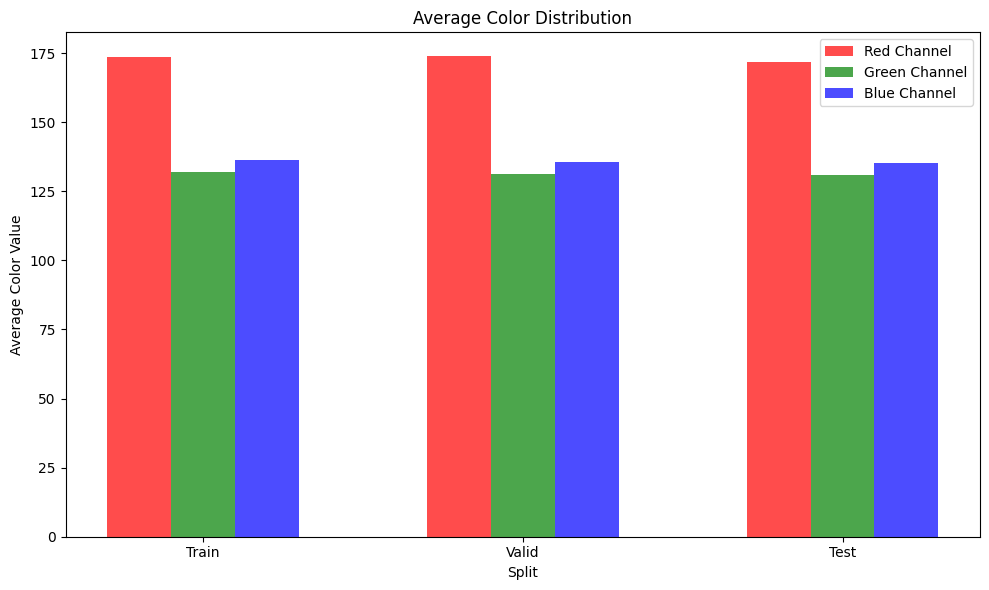

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to get image paths for a given split
def get_image_paths(split):
    split_dir = os.path.join(dataset_dir, split)
    image_paths = [os.path.join(split_dir, 'images', f) for f in os.listdir(os.path.join(split_dir, 'images')) if f.endswith(('.jpg', '.png', '.bmp'))]
    return image_paths

# Function to get color distribution for a set of image paths
def get_color_distribution(image_paths):
    r_means, g_means, b_means = [], [], []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        r_means.append(np.mean(img[:, :, 0]))
        g_means.append(np.mean(img[:, :, 1]))
        b_means.append(np.mean(img[:, :, 2]))
    return np.mean(r_means), np.mean(g_means), np.mean(b_means)

# Get image paths for train, valid, and test splits
train_images = get_image_paths('train')
valid_images = get_image_paths('valid')
test_images = get_image_paths('test')

# Get color distributions for each split
train_r, train_g, train_b = get_color_distribution(train_images)
valid_r, valid_g, valid_b = get_color_distribution(valid_images)
test_r, test_g, test_b = get_color_distribution(test_images)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average color distributions
bar_width = 0.2
index = np.arange(3)
rects1 = ax.bar(index, [train_r, valid_r, test_r], bar_width, color='r', alpha=0.7, label='Red Channel')
rects2 = ax.bar(index + bar_width, [train_g, valid_g, test_g], bar_width, color='g', alpha=0.7, label='Green Channel')
rects3 = ax.bar(index + 2 * bar_width, [train_b, valid_b, test_b], bar_width, color='b', alpha=0.7, label='Blue Channel')

# Set the x-axis labels
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['Train', 'Valid', 'Test'])

# Set the plot title and axis labels
ax.set_title('Average Color Distribution')
ax.set_xlabel('Split')
ax.set_ylabel('Average Color Value')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

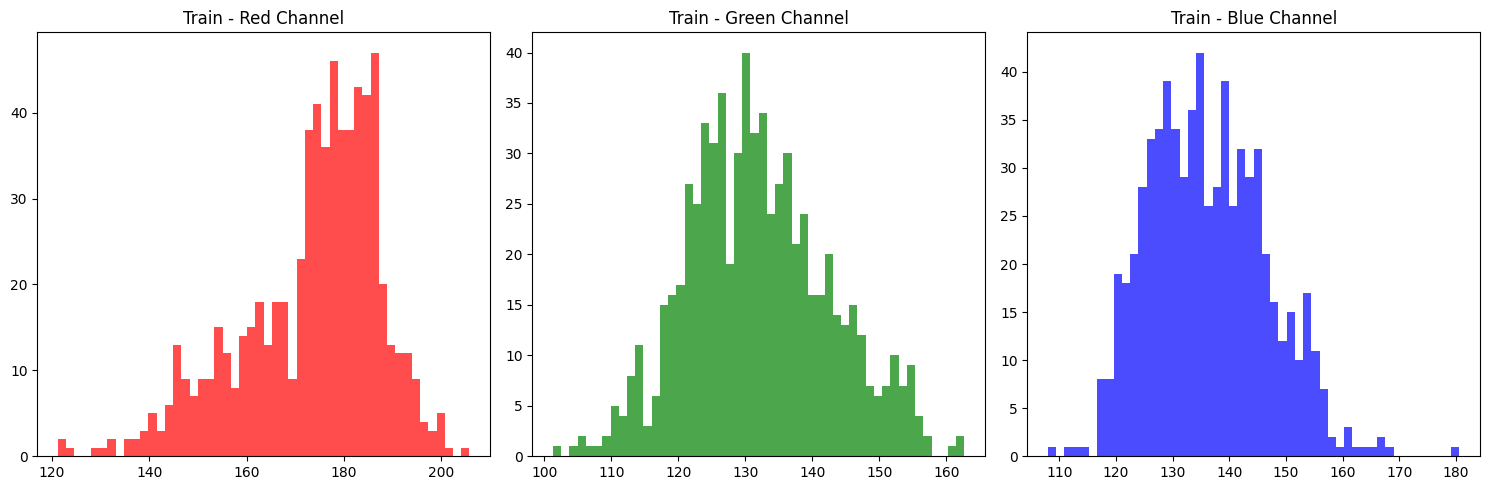

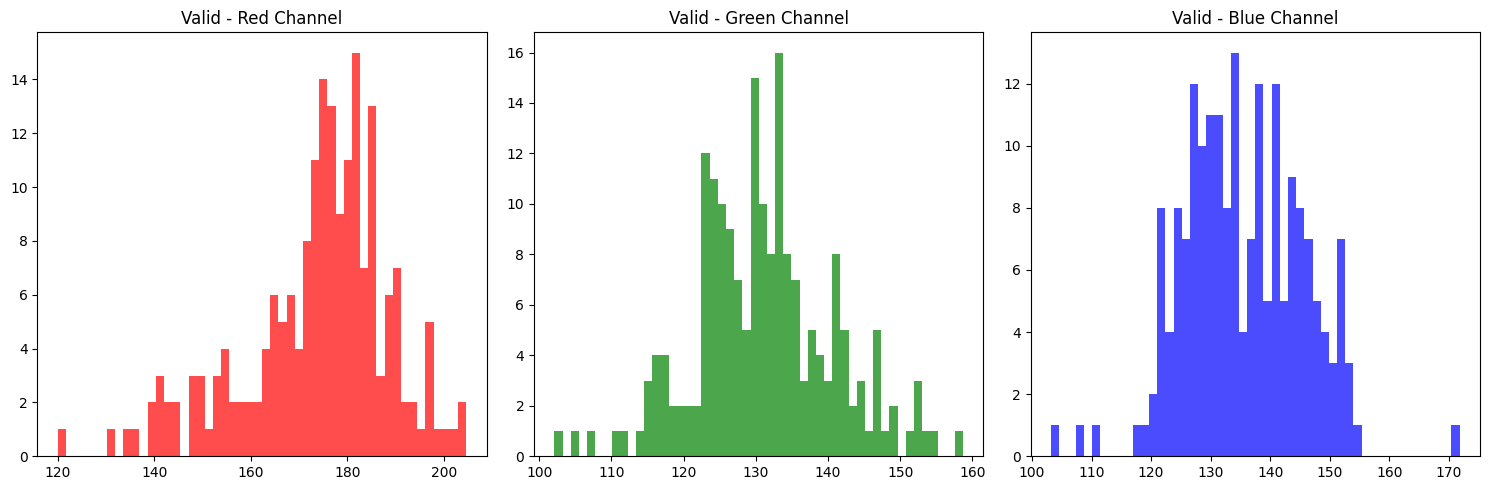

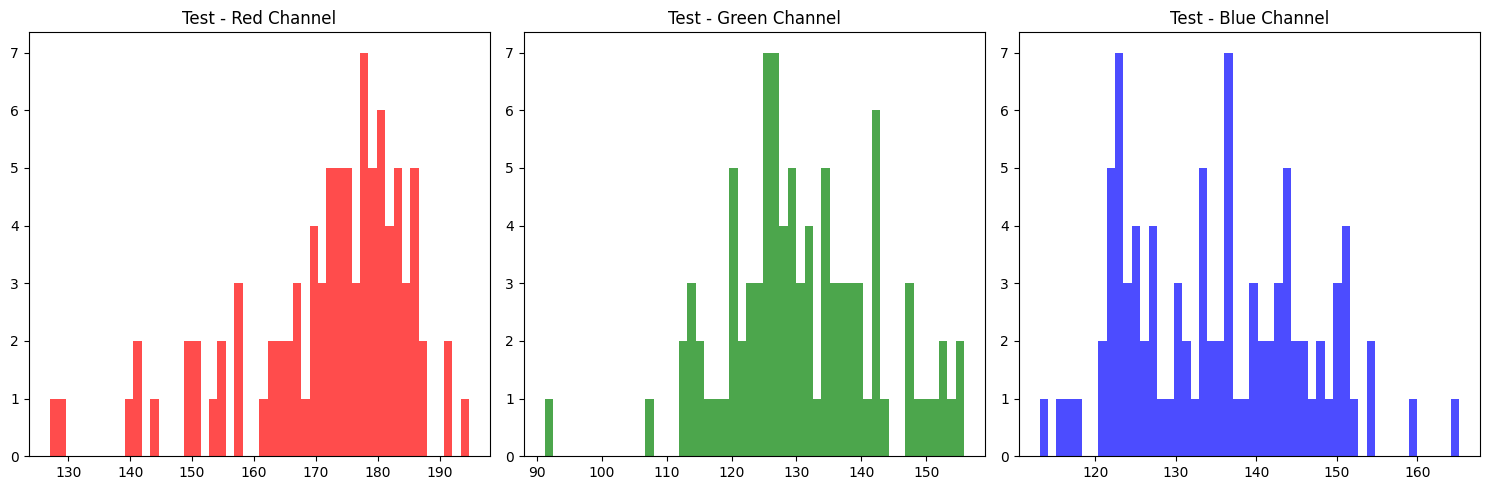

In [ ]:
def get_color_distribution(image_paths):
    r_means, g_means, b_means = [], [], []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        r_means.append(np.mean(img[:,:,0]))
        g_means.append(np.mean(img[:,:,1]))
        b_means.append(np.mean(img[:,:,2]))
    return r_means, g_means, b_means

for dataset, paths in [("Train", train_images), ("Valid", valid_images), ("Test", test_images)]:
    r, g, b = get_color_distribution(paths)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(r, bins=50, color='r', alpha=0.7)
    plt.title(f"{dataset} - Red Channel")
    plt.subplot(1, 3, 2)
    plt.hist(g, bins=50, color='g', alpha=0.7)
    plt.title(f"{dataset} - Green Channel")
    plt.subplot(1, 3, 3)
    plt.hist(b, bins=50, color='b', alpha=0.7)
    plt.title(f"{dataset} - Blue Channel")
    plt.tight_layout()
    plt.show()

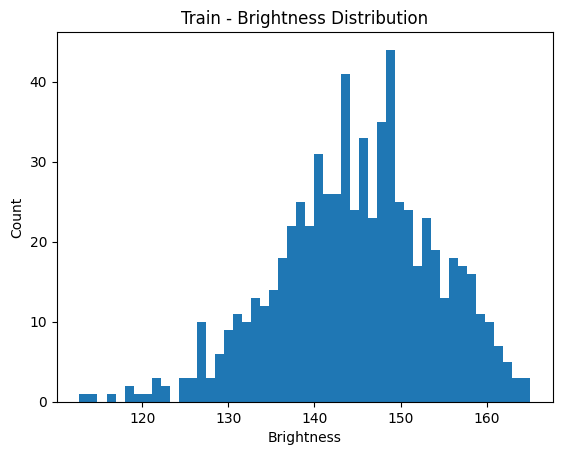

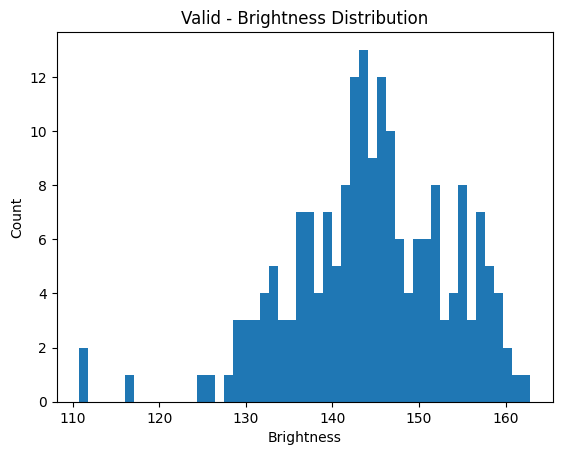

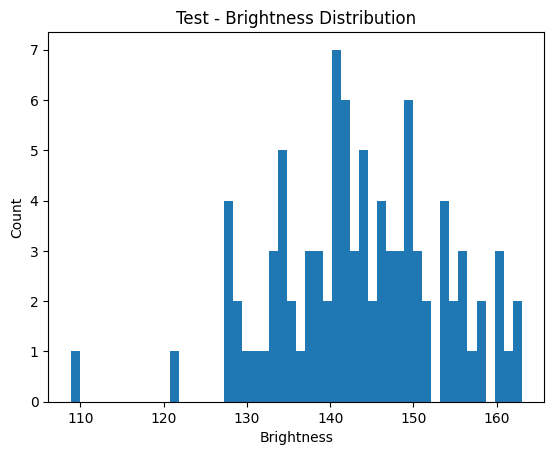

In [ ]:
def get_brightness_distribution(image_paths):
    brightness = []
    for img_path in image_paths:
        img = cv2.imread(img_path, 0)  # Read as grayscale
        brightness.append(np.mean(img))
    return brightness

for dataset, paths in [("Train", train_images), ("Valid", valid_images), ("Test", test_images)]:
    brightness = get_brightness_distribution(paths)
    plt.hist(brightness, bins=50)
    plt.title(f"{dataset} - Brightness Distribution")
    plt.xlabel("Brightness")
    plt.ylabel("Count")
    plt.show()

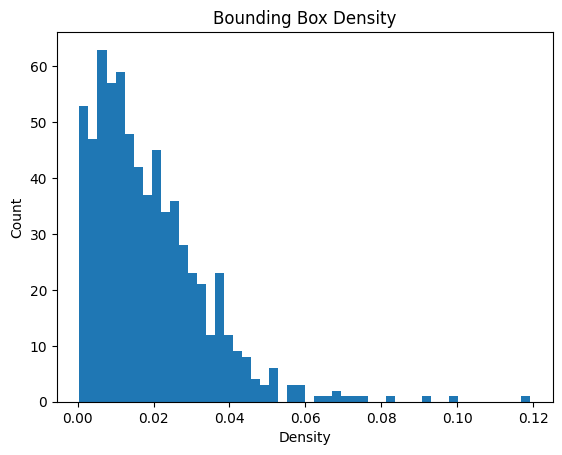

In [ ]:
def get_bbox_density(label_paths, image_paths):
    densities = []
    for label_path, img_path in zip(label_paths, image_paths):
        img = Image.open(img_path)
        img_area = img.size[0] * img.size[1]
        bbox_area = 0
        with open(label_path, 'r') as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                bbox_area += w * h * img_area
        densities.append(bbox_area / img_area)
    return densities

bbox_densities = get_bbox_density(train_labels, train_images)

plt.hist(bbox_densities, bins=50)
plt.title("Bounding Box Density")
plt.xlabel("Density")
plt.ylabel("Count")
plt.show()

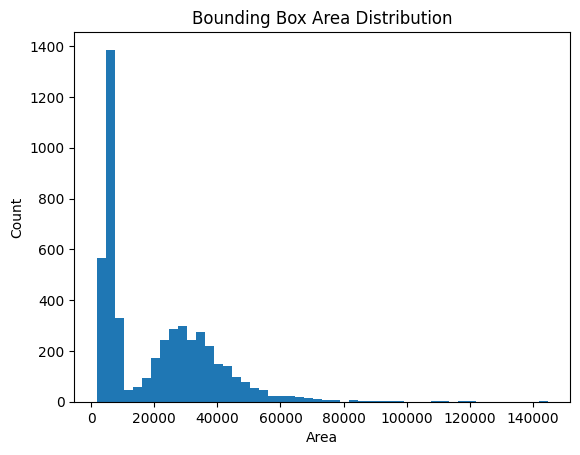

In [ ]:
plt.hist(annotation_sizes, bins=50)
plt.title("Bounding Box Area Distribution")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

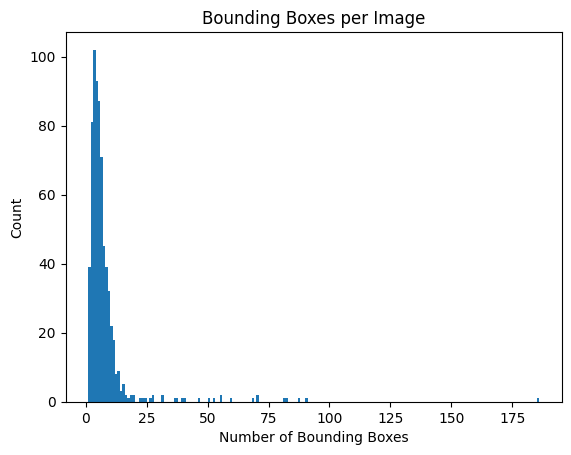

In [ ]:
plt.hist(annotations_per_image, bins=range(min(annotations_per_image), max(annotations_per_image) + 2, 1))
plt.title("Bounding Boxes per Image")
plt.xlabel("Number of Bounding Boxes")
plt.ylabel("Count")
plt.show()

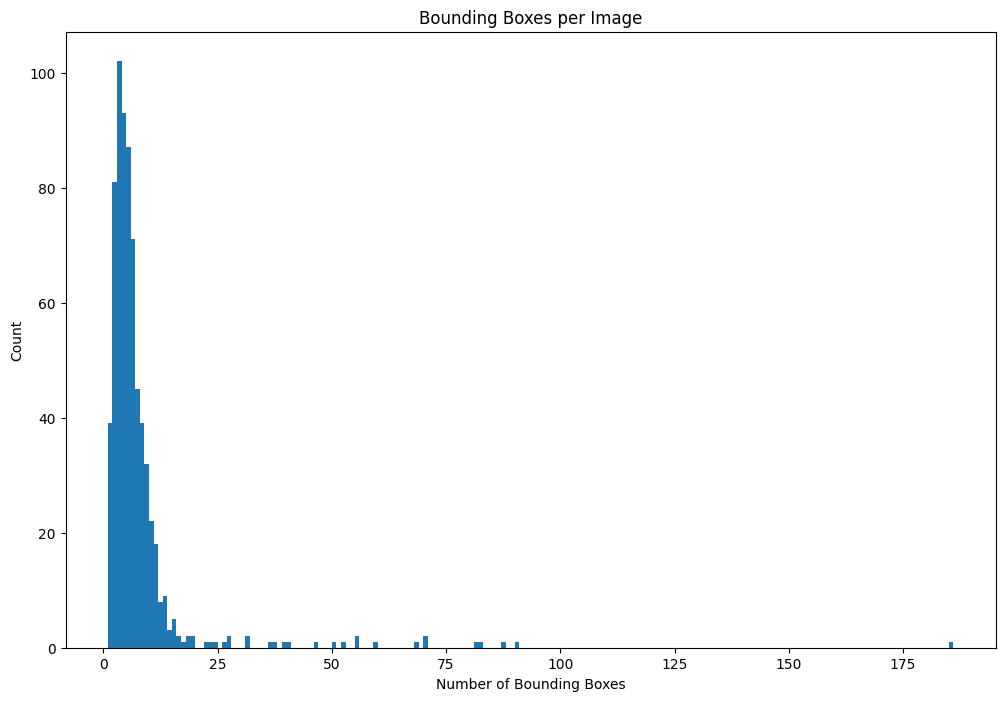

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(annotations_per_image, bins=range(min(annotations_per_image), max(annotations_per_image) + 2, 1))
plt.title("Bounding Boxes per Image")
plt.xlabel("Number of Bounding Boxes")
plt.ylabel("Count")
plt.show()

For train


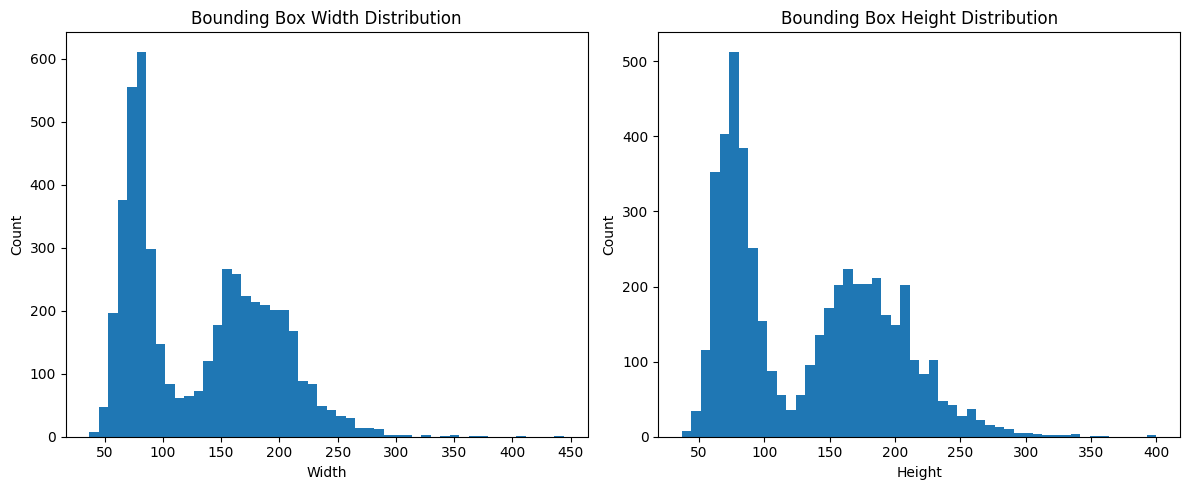

In [ ]:
def get_bbox_dimensions(label_paths, image_paths):
    widths, heights = [], []
    for label_path, img_path in zip(label_paths, image_paths):
        img = Image.open(img_path)
        img_width, img_height = img.size
        with open(label_path, 'r') as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                widths.append(w * img_width)
                heights.append(h * img_height)
    return widths, heights

bbox_widths, bbox_heights = get_bbox_dimensions(train_labels, train_images)

print("For train")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(bbox_widths, bins=50)
plt.title("Bounding Box Width Distribution")
plt.xlabel("Width")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.hist(bbox_heights, bins=50)
plt.title("Bounding Box Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


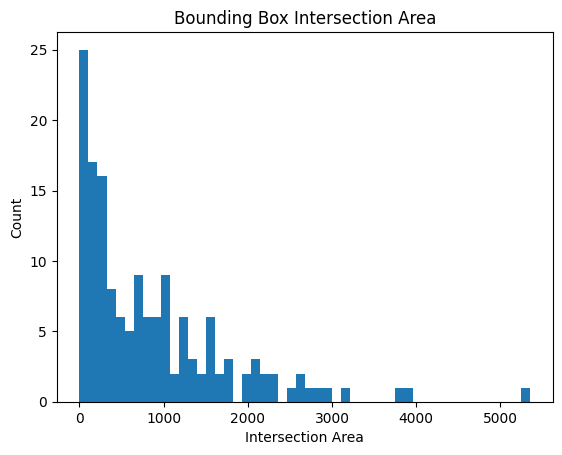

In [ ]:
def get_bbox_intersections(label_paths, image_paths):
    intersections = []
    for label_path, img_path in zip(label_paths, image_paths):
        img = Image.open(img_path)
        img_width, img_height = img.size
        bboxes = []
        with open(label_path, 'r') as f:
            for line in f:
                _, x, y, w, h = map(float, line.split())
                x1, y1 = x - w/2, y - h/2
                x2, y2 = x + w/2, y + h/2
                bboxes.append([x1*img_width, y1*img_height, x2*img_width, y2*img_height])

        for i in range(len(bboxes)):
            for j in range(i+1, len(bboxes)):
                x1 = max(bboxes[i][0], bboxes[j][0])
                y1 = max(bboxes[i][1], bboxes[j][1])
                x2 = min(bboxes[i][2], bboxes[j][2])
                y2 = min(bboxes[i][3], bboxes[j][3])

                if x1 < x2 and y1 < y2:
                    intersection_area = (x2 - x1) * (y2 - y1)
                    intersections.append(intersection_area)

    return intersections

bbox_intersections = get_bbox_intersections(train_labels, train_images)

plt.hist(bbox_intersections, bins=50)
plt.title("Bounding Box Intersection Area")
plt.xlabel("Intersection Area")
plt.ylabel("Count")
plt.show()